# A. IMPORT LIBRARIES

In [3]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
from scipy import stats as st
from scipy.stats import norm, beta
from sklearn.mixture import GaussianMixture
import pickle

# B. IMPORT DATASETS

In [4]:
####CHECK STORED DF#####
# Deserialization
with open("dfXY.pickle", "rb") as infile:
    dfXYPickle = pickle.load(infile)
#print("Reconstructed object", dfXYPickle)

In [5]:
dfXY = dfXYPickle.copy()

 # C. Pre-process



In [6]:
#Make sure exports are okay

In [7]:
print(dfXY.shape)
dfXY.head(2)

(21907, 186)


,AP1_FurnaceThickness,AP1_FurnaceWidth,AP1_FurnaceCombustionAirPressureCV,AP1_FurnaceCombustionAirPressureFeedback,AP1_FurnaceCombustionAirPressureSetPoint,AP1_FurnaceCombustionAirTempFurnace,AP1_FurnaceDilutionAirTemperatureCV,AP1_FurnaceDilutionAirTemperatureFeedback,AP1_FurnaceDilutionAirTemperatureSetPoint,AP1_FurnaceLineSpeed,...,AP1_FurnaceZone8TopGasFlowFeedback,AP1_FurnaceZone8TopTemp,AP1_FurnaceZone8TurndownOn,CurrentGuage,CurrentWidth,CoilLength,NetWeight,grade,pyro2,SteelFamCluster
ts,,,,,,,,,,,,,,,,,,,,,
2024-05-09 08:40:00,0.04,61.0,100.0,1.014615,2.0,373.529572,0.0,370.505768,1700.0,124.969482,...,100.139836,2013.073486,0,0.04,61.4117,8090.3,69160.0,120,1980.0,HighGoal
2024-05-09 08:42:00,0.04,61.0,100.0,0.956586,2.0,378.090790,0.0,374.100006,1700.0,124.969482,...,99.302085,2042.722168,0,0.04,61.4117,8090.3,69160.0,120,1980.0,HighGoal


In [49]:
dfXY.columns.tolist()

['AP1_FurnaceThickness',
 'AP1_FurnaceWidth',
 'AP1_FurnaceCombustionAirPressureCV',
 'AP1_FurnaceCombustionAirPressureFeedback',
 'AP1_FurnaceCombustionAirPressureSetPoint',
 'AP1_FurnaceCombustionAirTempFurnace',
 'AP1_FurnaceDilutionAirTemperatureCV',
 'AP1_FurnaceDilutionAirTemperatureFeedback',
 'AP1_FurnaceDilutionAirTemperatureSetPoint',
 'AP1_FurnaceLineSpeed',
 'AP1_FurnaceNonContactWaterPressure',
 'AP1_FurnacePressureCV',
 'AP1_FurnacePressureFeedback',
 'AP1_FurnacePressureSetPoint',
 'AP1_FurnacePyro1Temp',
 'AP1_FurnacePyro2Temp',
 'AP1_FurnaceRWPEntryTemp',
 'AP1_FurnaceRWPExitTemp',
 'AP1_FurnaceRecuperatorInletTemp',
 'AP1_FurnaceRecuperatorOutletTemp',
 'AP1_FurnaceTV',
 'AP1_FurnaceTonsPerHour',
 'AP1_FurnaceTotalMeasuredGasFlow',
 'AP1_FurnaceTotalSummedAirFlow',
 'AP1_FurnaceWeldInFurnace',
 'AP1_FurnaceZone0BottomAir/GasRatioPV',
 'AP1_FurnaceZone0BottomAir/GasRatioSP',
 'AP1_FurnaceZone0BottomAirFlowControlValveCV',
 'AP1_FurnaceZone0BottomAirFlowFdbk',
 'AP1_Fur

In [14]:
#Strip column names
dfXY.columns=dfXY.columns.str.strip(' \t\n')
dfXY.drop(["SteelFamCluster"],axis=1,inplace=True)

In [47]:
dfXY.dtypes#.tail()

AP1_FurnaceThickness                         float64
AP1_FurnaceWidth                             float64
AP1_FurnaceCombustionAirPressureCV           float64
AP1_FurnaceCombustionAirPressureFeedback     float64
AP1_FurnaceCombustionAirPressureSetPoint     float64
                                              ...   
CoilLength                                   float64
NetWeight                                    float64
grade                                       category
pyro2                                        float64
SteelFamCluster                             category
Length: 186, dtype: object

In [48]:
dfXY.isna().sum()#.head()

AP1_FurnaceThickness                        0
AP1_FurnaceWidth                            0
AP1_FurnaceCombustionAirPressureCV          0
AP1_FurnaceCombustionAirPressureFeedback    0
AP1_FurnaceCombustionAirPressureSetPoint    0
                                           ..
CoilLength                                  0
NetWeight                                   0
grade                                       0
pyro2                                       0
SteelFamCluster                             0
Length: 186, dtype: int64

In [17]:
dfXY[dfXY.columns[dfXY.dtypes == "category"]].head(2)

,AP1_FurnaceWeldInFurnace,AP1_FurnaceZone1TurndownOn,AP1_FurnaceZone2TurndownOn,AP1_FurnaceZone3TurndownOn,AP1_FurnaceZone4TurndownOn,AP1_FurnaceZone5TurndownOn,AP1_FurnaceZone6TurndownOn,AP1_FurnaceZone7TurndownOn,AP1_FurnaceZone8TurndownOn,grade
ts,,,,,,,,,,
2024-05-09 08:40:00,0,0,0,0,0,0,0,0,0,120
2024-05-09 08:42:00,0,0,0,0,0,0,0,0,0,120


## C.1 Clean categorical vars

In [19]:
#Remove decimals in categorical
dfXY[dfXY.columns[dfXY.dtypes == "category"]]=dfXY[dfXY.columns[dfXY.dtypes == "category"]].astype(np.int64)
dfXY[["AP1_FurnaceWeldInFurnace","AP1_FurnaceZone1TurndownOn","AP1_FurnaceZone2TurndownOn","AP1_FurnaceZone3TurndownOn","AP1_FurnaceZone4TurndownOn","AP1_FurnaceZone5TurndownOn","AP1_FurnaceZone6TurndownOn","AP1_FurnaceZone7TurndownOn","AP1_FurnaceZone8TurndownOn","grade"]]=dfXY[["AP1_FurnaceWeldInFurnace","AP1_FurnaceZone1TurndownOn","AP1_FurnaceZone2TurndownOn","AP1_FurnaceZone3TurndownOn","AP1_FurnaceZone4TurndownOn","AP1_FurnaceZone5TurndownOn","AP1_FurnaceZone6TurndownOn","AP1_FurnaceZone7TurndownOn","AP1_FurnaceZone8TurndownOn","grade"]].astype("category")#,"SteelGradeID"
#dfXY.dtypes#info(verbose=True)
dfXY[dfXY.columns[dfXY.dtypes == "category"]].head(2)

,AP1_FurnaceWeldInFurnace,AP1_FurnaceZone1TurndownOn,AP1_FurnaceZone2TurndownOn,AP1_FurnaceZone3TurndownOn,AP1_FurnaceZone4TurndownOn,AP1_FurnaceZone5TurndownOn,AP1_FurnaceZone6TurndownOn,AP1_FurnaceZone7TurndownOn,AP1_FurnaceZone8TurndownOn,grade
ts,,,,,,,,,,
2024-05-09 08:40:00,0,0,0,0,0,0,0,0,0,120
2024-05-09 08:42:00,0,0,0,0,0,0,0,0,0,120


#Remove SteelGradeID
SteelGradeID=dfXY.SteelGradeID
SteelGradeID.head()

dfXY.drop("SteelGradeID",inplace=True,axis=1)
dfXY.head(2)

In [20]:
#Make a copy of dfXY in case
dfXYold = dfXY.copy()
dfXYold.head(2)

,AP1_FurnaceThickness,AP1_FurnaceWidth,AP1_FurnaceCombustionAirPressureCV,AP1_FurnaceCombustionAirPressureFeedback,AP1_FurnaceCombustionAirPressureSetPoint,AP1_FurnaceCombustionAirTempFurnace,AP1_FurnaceDilutionAirTemperatureCV,AP1_FurnaceDilutionAirTemperatureFeedback,AP1_FurnaceDilutionAirTemperatureSetPoint,AP1_FurnaceLineSpeed,...,AP1_FurnaceZone8TopGasFlowControlValveOutput,AP1_FurnaceZone8TopGasFlowFeedback,AP1_FurnaceZone8TopTemp,AP1_FurnaceZone8TurndownOn,CurrentGuage,CurrentWidth,CoilLength,NetWeight,grade,pyro2
ts,,,,,,,,,,,,,,,,,,,,,
2024-05-09 08:40:00,0.04,61.0,100.0,1.014615,2.0,373.529572,0.0,370.505768,1700.0,124.969482,...,51.117462,100.139836,2013.073486,0,0.04,61.4117,8090.3,69160.0,120,1980.0
2024-05-09 08:42:00,0.04,61.0,100.0,0.956586,2.0,378.090790,0.0,374.100006,1700.0,124.969482,...,53.594242,99.302085,2042.722168,0,0.04,61.4117,8090.3,69160.0,120,1980.0


## C.2 Clean numeric vars

In [21]:
# Numeric variable .description() check
# 
# min/max vs quantiles, mean, and standard deviation – looking for outliers/sensible results
# 
# Distribution plot examination
# 
# can use .hist() command or a more customized subplot group or for-each loop to plot a seperate histogram of each variable

In [22]:
#Numeric vars
numerical_var_series=dfXY[dfXY.columns[dfXY.dtypes == np.float64]].columns#.to_list()#[0:5]
print(type(numerical_var_series))
print(len(numerical_var_series))
numerical_var_series

<class 'pandas.core.indexes.base.Index'>
175


Index(['AP1_FurnaceThickness', 'AP1_FurnaceWidth',
       'AP1_FurnaceCombustionAirPressureCV',
       'AP1_FurnaceCombustionAirPressureFeedback',
       'AP1_FurnaceCombustionAirPressureSetPoint',
       'AP1_FurnaceCombustionAirTempFurnace',
       'AP1_FurnaceDilutionAirTemperatureCV',
       'AP1_FurnaceDilutionAirTemperatureFeedback',
       'AP1_FurnaceDilutionAirTemperatureSetPoint', 'AP1_FurnaceLineSpeed',
       ...
       'AP1_FurnaceZone8TopAirGasRatioActual',
       'AP1_FurnaceZone8TopAirGasRatioSetpoint',
       'AP1_FurnaceZone8TopGasFlowControlValveOutput',
       'AP1_FurnaceZone8TopGasFlowFeedback', 'AP1_FurnaceZone8TopTemp',
       'CurrentGuage', 'CurrentWidth', 'CoilLength', 'NetWeight', 'pyro2'],
      dtype='object', length=175)

In [23]:
#Create the different groups of columns to plot
proceso_vars_series=dfXY[numerical_var_series[(~numerical_var_series.str.contains("AP1_Furnace",regex=False)) & (~numerical_var_series.str.contains("pyro2",regex=False))]].columns#.head(1)
zoneTemp_vars_series=dfXY[numerical_var_series[numerical_var_series.str.contains(".*Zone.*Temp.*",regex=True)]].columns#.head(1)

zoneAirGas_vars_series=dfXY[numerical_var_series[numerical_var_series.str.contains(".*Zone.*Air.*|.*Zone.*Gas.*",regex=True)]].columns#.head(1)

recuperator_vars_series=dfXY[numerical_var_series[numerical_var_series.str.contains("AP1_Furnace.*Dilution|Recuperator|RWP|Combustion.*",regex=True)]].columns#.head(1)

pyro_vars_series=dfXY[numerical_var_series[numerical_var_series.str.contains(".*pyro.*|.*Pyro.*",regex=True)]].columns#.head(1)

rest_vars_series=dfXY[[var for var in numerical_var_series.to_list() if var not in proceso_vars_series.to_list() and var not in zoneTemp_vars_series.to_list() and var not in zoneAirGas_vars_series.to_list() and var not in recuperator_vars_series.to_list() and var not in pyro_vars_series.to_list()]].columns#.head(1)

In [24]:
#Statistic description of numeric vars
dfXYold_description=dfXYold.describe()
dfXYold_description

,AP1_FurnaceThickness,AP1_FurnaceWidth,AP1_FurnaceCombustionAirPressureCV,AP1_FurnaceCombustionAirPressureFeedback,AP1_FurnaceCombustionAirPressureSetPoint,AP1_FurnaceCombustionAirTempFurnace,AP1_FurnaceDilutionAirTemperatureCV,AP1_FurnaceDilutionAirTemperatureFeedback,AP1_FurnaceDilutionAirTemperatureSetPoint,AP1_FurnaceLineSpeed,...,AP1_FurnaceZone8TopAirGasRatioActual,AP1_FurnaceZone8TopAirGasRatioSetpoint,AP1_FurnaceZone8TopGasFlowControlValveOutput,AP1_FurnaceZone8TopGasFlowFeedback,AP1_FurnaceZone8TopTemp,CurrentGuage,CurrentWidth,CoilLength,NetWeight,pyro2
count,21907.000000,21907.000000,21907.0,21907.000000,21907.0,21907.000000,21907.0,21907.000000,21907.0,21907.000000,...,21907.000000,21907.000000,21907.000000,21907.000000,21907.000000,21907.000000,21907.000000,21907.000000,21907.000000,21907.000000
mean,0.069078,56.306751,100.0,1.115239,2.0,432.273056,0.0,426.635041,1700.0,119.571943,...,1.776004,1.199973,35.152377,58.004930,1977.255034,0.069087,56.478689,6286.391080,62566.733008,1896.040991
std,0.037422,6.621839,0.0,0.249432,0.0,68.166932,0.0,65.338182,0.0,50.965182,...,2.790560,0.002340,15.179243,34.880842,222.669463,0.037437,6.678104,3458.378325,9415.245745,132.100182
min,0.022000,37.000000,100.0,0.691062,2.0,157.215286,0.0,160.497681,1700.0,0.000000,...,0.833438,1.000000,5.000000,0.096140,873.977173,0.022000,36.770200,1323.600000,15630.000000,1640.000000
25%,0.034500,49.000000,100.0,0.904534,2.0,401.665817,0.0,398.300049,1700.0,84.310143,...,1.200340,1.200000,21.441599,21.882601,1852.681152,0.034500,49.286200,3284.400000,57150.000000,1900.000000
50%,0.057500,61.000000,100.0,1.095340,2.0,461.863647,0.0,454.599518,1700.0,121.916977,...,1.203946,1.200000,37.638889,62.242664,2052.666260,0.057500,61.254300,5575.900000,66070.000000,1980.000000
75%,0.101500,61.000000,100.0,1.315594,2.0,478.798187,0.0,470.602295,1700.0,164.133095,...,1.249647,1.200000,50.737694,96.833939,2127.128540,0.101500,61.411700,9113.400000,70450.000000,1980.000000
max,0.176000,63.000000,100.0,1.728980,2.0,532.595581,0.0,524.375061,1700.0,220.024429,...,162.270401,1.200000,100.000000,101.474057,2214.954834,0.176000,62.868400,14958.600000,72930.000000,1990.000000


In [25]:
#Cuts to consider outliers
cut_neg = dfXYold_description.iloc[1] - 3*dfXYold_description.iloc[2] #mean-3*std
cut_pos = dfXYold_description.iloc[1] + 3*dfXYold_description.iloc[2] #mean+3*std
cut_neg.name = 'cut-'
cut_pos.name = 'cut+'
cut_neg = pd.DataFrame(cut_neg).T
cut_pos = pd.DataFrame(cut_pos).T
tbl_desc = pd.concat([dfXYold_description,cut_neg, cut_pos])
tbl_desc

,AP1_FurnaceThickness,AP1_FurnaceWidth,AP1_FurnaceCombustionAirPressureCV,AP1_FurnaceCombustionAirPressureFeedback,AP1_FurnaceCombustionAirPressureSetPoint,AP1_FurnaceCombustionAirTempFurnace,AP1_FurnaceDilutionAirTemperatureCV,AP1_FurnaceDilutionAirTemperatureFeedback,AP1_FurnaceDilutionAirTemperatureSetPoint,AP1_FurnaceLineSpeed,...,AP1_FurnaceZone8TopAirGasRatioActual,AP1_FurnaceZone8TopAirGasRatioSetpoint,AP1_FurnaceZone8TopGasFlowControlValveOutput,AP1_FurnaceZone8TopGasFlowFeedback,AP1_FurnaceZone8TopTemp,CurrentGuage,CurrentWidth,CoilLength,NetWeight,pyro2
count,21907.000000,21907.000000,21907.0,21907.000000,21907.0,21907.000000,21907.0,21907.000000,21907.0,21907.000000,...,21907.000000,21907.000000,21907.000000,21907.000000,21907.000000,21907.000000,21907.000000,21907.000000,21907.000000,21907.000000
mean,0.069078,56.306751,100.0,1.115239,2.0,432.273056,0.0,426.635041,1700.0,119.571943,...,1.776004,1.199973,35.152377,58.004930,1977.255034,0.069087,56.478689,6286.391080,62566.733008,1896.040991
std,0.037422,6.621839,0.0,0.249432,0.0,68.166932,0.0,65.338182,0.0,50.965182,...,2.790560,0.002340,15.179243,34.880842,222.669463,0.037437,6.678104,3458.378325,9415.245745,132.100182
min,0.022000,37.000000,100.0,0.691062,2.0,157.215286,0.0,160.497681,1700.0,0.000000,...,0.833438,1.000000,5.000000,0.096140,873.977173,0.022000,36.770200,1323.600000,15630.000000,1640.000000
25%,0.034500,49.000000,100.0,0.904534,2.0,401.665817,0.0,398.300049,1700.0,84.310143,...,1.200340,1.200000,21.441599,21.882601,1852.681152,0.034500,49.286200,3284.400000,57150.000000,1900.000000
50%,0.057500,61.000000,100.0,1.095340,2.0,461.863647,0.0,454.599518,1700.0,121.916977,...,1.203946,1.200000,37.638889,62.242664,2052.666260,0.057500,61.254300,5575.900000,66070.000000,1980.000000
75%,0.101500,61.000000,100.0,1.315594,2.0,478.798187,0.0,470.602295,1700.0,164.133095,...,1.249647,1.200000,50.737694,96.833939,2127.128540,0.101500,61.411700,9113.400000,70450.000000,1980.000000
max,0.176000,63.000000,100.0,1.728980,2.0,532.595581,0.0,524.375061,1700.0,220.024429,...,162.270401,1.200000,100.000000,101.474057,2214.954834,0.176000,62.868400,14958.600000,72930.000000,1990.000000
cut-,-0.043189,36.441236,100.0,0.366942,2.0,227.772258,0.0,230.620495,1700.0,-33.323604,...,-6.595676,1.192952,-10.385352,-46.637595,1309.246645,-0.043225,36.444376,-4088.743895,34320.995773,1499.740445
cut+,0.181344,76.172267,100.0,1.863536,2.0,636.773853,0.0,622.649587,1700.0,272.467490,...,10.147683,1.206994,80.690105,162.647455,2645.263423,0.181400,76.513001,16661.526056,90812.470242,2292.341538


dfXY=dfXYold.copy()

In [26]:
#Ini Tune cut
for c in range(tbl_desc.shape[1]):
    if tbl_desc.loc['cut-',tbl_desc.columns[c]]<0:
        tbl_desc.loc['cut-',tbl_desc.columns[c]]=0
    if tbl_desc.columns[c]=='AP1_FurnaceWidth':
        tbl_desc.loc['cut-',tbl_desc.columns[c]]=0 #some widthIDs are smaller than the actual cut-
    elif tbl_desc.columns[c]=='NetWeight':
        tbl_desc.loc['cut-',tbl_desc.columns[c]]=5000 #min around 20k, if cut for defects would be 10k. To be conservative 5k
    elif tbl_desc.columns[c] in tbl_desc.columns[tbl_desc.columns.str.contains('Ratio',regex=False)]:
        tbl_desc.loc['cut-',tbl_desc.columns[c]]=0
        tbl_desc.loc['cut+',tbl_desc.columns[c]]=4
    elif tbl_desc.columns[c] in tbl_desc.columns[tbl_desc.columns.str.contains("P1_FurnaceZone.*[C].*[V].*",regex=True)]:
        tbl_desc.loc['cut-',tbl_desc.columns[c]]=0
        tbl_desc.loc['cut+',tbl_desc.columns[c]]=100 #CV vars are in %
    elif  tbl_desc.columns[c] in zoneAirGas_vars_series[zoneAirGas_vars_series.str.contains("Zone0",regex=False) & ~zoneAirGas_vars_series.str.contains("Ratio",regex=False)]:
        tbl_desc.loc['cut-',tbl_desc.columns[c]]=0
        tbl_desc.loc['cut+',tbl_desc.columns[c]]=100 #Zone0 airgas vars are in %
    elif tbl_desc.columns[c] in zoneTemp_vars_series[~zoneTemp_vars_series.str.contains("CV",regex=False)]:
        if tbl_desc.loc['cut-',tbl_desc.columns[c]]<=500:
            tbl_desc.loc['cut-',tbl_desc.columns[c]]=500 #Zone 0 seems to have many values near 0 that are outside the bell
    elif tbl_desc.columns[c] in pyro_vars_series[pyro_vars_series.str.contains("Temp",regex=False)]:
        tbl_desc.loc['cut-',tbl_desc.columns[c]]=1400 #pyro sensors seem to have many values at 1200 that are outside the bimodal bell, p() bc it is the lower limit of the sensor
tbl_desc

,AP1_FurnaceThickness,AP1_FurnaceWidth,AP1_FurnaceCombustionAirPressureCV,AP1_FurnaceCombustionAirPressureFeedback,AP1_FurnaceCombustionAirPressureSetPoint,AP1_FurnaceCombustionAirTempFurnace,AP1_FurnaceDilutionAirTemperatureCV,AP1_FurnaceDilutionAirTemperatureFeedback,AP1_FurnaceDilutionAirTemperatureSetPoint,AP1_FurnaceLineSpeed,...,AP1_FurnaceZone8TopAirGasRatioActual,AP1_FurnaceZone8TopAirGasRatioSetpoint,AP1_FurnaceZone8TopGasFlowControlValveOutput,AP1_FurnaceZone8TopGasFlowFeedback,AP1_FurnaceZone8TopTemp,CurrentGuage,CurrentWidth,CoilLength,NetWeight,pyro2
count,21907.000000,21907.000000,21907.0,21907.000000,21907.0,21907.000000,21907.0,21907.000000,21907.0,21907.000000,...,21907.000000,21907.000000,21907.000000,21907.000000,21907.000000,21907.000000,21907.000000,21907.000000,21907.000000,21907.000000
mean,0.069078,56.306751,100.0,1.115239,2.0,432.273056,0.0,426.635041,1700.0,119.571943,...,1.776004,1.199973,35.152377,58.004930,1977.255034,0.069087,56.478689,6286.391080,62566.733008,1896.040991
std,0.037422,6.621839,0.0,0.249432,0.0,68.166932,0.0,65.338182,0.0,50.965182,...,2.790560,0.002340,15.179243,34.880842,222.669463,0.037437,6.678104,3458.378325,9415.245745,132.100182
min,0.022000,37.000000,100.0,0.691062,2.0,157.215286,0.0,160.497681,1700.0,0.000000,...,0.833438,1.000000,5.000000,0.096140,873.977173,0.022000,36.770200,1323.600000,15630.000000,1640.000000
25%,0.034500,49.000000,100.0,0.904534,2.0,401.665817,0.0,398.300049,1700.0,84.310143,...,1.200340,1.200000,21.441599,21.882601,1852.681152,0.034500,49.286200,3284.400000,57150.000000,1900.000000
50%,0.057500,61.000000,100.0,1.095340,2.0,461.863647,0.0,454.599518,1700.0,121.916977,...,1.203946,1.200000,37.638889,62.242664,2052.666260,0.057500,61.254300,5575.900000,66070.000000,1980.000000
75%,0.101500,61.000000,100.0,1.315594,2.0,478.798187,0.0,470.602295,1700.0,164.133095,...,1.249647,1.200000,50.737694,96.833939,2127.128540,0.101500,61.411700,9113.400000,70450.000000,1980.000000
max,0.176000,63.000000,100.0,1.728980,2.0,532.595581,0.0,524.375061,1700.0,220.024429,...,162.270401,1.200000,100.000000,101.474057,2214.954834,0.176000,62.868400,14958.600000,72930.000000,1990.000000
cut-,0.000000,0.000000,100.0,0.366942,2.0,227.772258,0.0,230.620495,1700.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,1309.246645,0.000000,36.444376,0.000000,5000.000000,1499.740445
cut+,0.181344,76.172267,100.0,1.863536,2.0,636.773853,0.0,622.649587,1700.0,272.467490,...,4.000000,4.000000,100.000000,162.647455,2645.263423,0.181400,76.513001,16661.526056,90812.470242,2292.341538


In [27]:
zoneTemp_vars_series

Index(['AP1_FurnaceZone0MasterTempControlValveCV',
       'AP1_FurnaceZone0MasterTempFdbk',
       'AP1_FurnaceZone0MasterTempOperatorSetpoint',
       'AP1_FurnaceZone0MasterTempSetpoint',
       'AP1_FurnaceZone1TemperatureSetpoint', 'AP1_FurnaceZone1TopTemp',
       'AP1_FurnaceZone2TemperatureSetpoint', 'AP1_FurnaceZone2TopTemp',
       'AP1_FurnaceZone3TemperatureSetpoint', 'AP1_FurnaceZone3TopTemp',
       'AP1_FurnaceZone4TemperatureSetpoint', 'AP1_FurnaceZone4TopTemp',
       'AP1_FurnaceZone5TemperatureSetpoint', 'AP1_FurnaceZone5TopTemp',
       'AP1_FurnaceZone6TemperatureSetpoint', 'AP1_FurnaceZone6TopTemp',
       'AP1_FurnaceZone7TemperatureSetpoint', 'AP1_FurnaceZone7TopTemp',
       'AP1_FurnaceZone8TemperatureSetpoint', 'AP1_FurnaceZone8TopTemp'],
      dtype='object')

#### Make Air/Gas Flows in 0-100%
Air/Gas ratios are in 0-4 scale
Zone0: Already in %
Zone1: Bottom/Top Air Flow in 0-47565 ($59655$)SCFH scale, Bottom/Top Gas Flow in 0-5170 SCFH scale
Zone2: Bottom/Top Air Flow in 0-47565 ($59655$)SCFH scale, Bottom/Top Gas Flow in 0-5170 SCFH scale
Zone3: Bottom/Top Air Flow in 0-34880 ($52831$)SCFH scale, Bottom/Top Gas Flow in 0-3350 SCFH scale
Zone4: Bottom/Top Air Flow in 0-34880 ($51951$)SCFH scale, Bottom/Top Gas Flow in 0-3685 SCFH scale
Zone5: Bottom/Top Air Flow in 0-27070 ($40318$)SCFH scale, Bottom/Top Gas Flow in 0-2860 SCFH scale
Zone6: Bottom/Top Air Flow in 0-27070 ($41004$)SCFH scale, Bottom/Top Gas Flow in 0-2860 SCFH scale
Zone7: Bottom Air Flow in 0-17490 ($26050$)SCFH scale, Bottom Gas Flow in 0-1680 SCFH scale
       Top Air Flow in 0-20400 ($30384$)SCFH scale, Top Gas Flow in 0-1960 SCFH scale
Zone8: Bottom Air Flow in 0-20400 ($30384$)SCFH scale, Bottom Gas Flow in 0-1960 SCFH scale
       Top Air Flow in 0-17490 ($26050$)SCFH scale, Top Gas Flow in 0-1680 SCFH scale


#AirGasRatios are already adimensional so no need of scaling
dfXY.loc[:,dfXY.columns[dfXY.columns.str.contains("Ratio",regex=False)]] = dfXY.loc[:,dfXY.columns[dfXY.columns.str.contains("Ratio",regex=False)]]/4*100

In [28]:
#Zone1
#Air
#dfXY.loc[:,dfXY.columns[(dfXY.columns.str.contains(".*Zone1BottomAirFlowFeedback.*|.*Zone1TopAirFlowFeedback.*",regex=True)) & (~dfXY.columns.str.contains("ControlValve",regex=False))]].head(2)
dfXY.loc[:,dfXY.columns[(dfXY.columns.str.contains(".*Zone1BottomAirFlowFeedback.*|.*Zone1TopAirFlowFeedback.*",regex=True)) & (~dfXY.columns.str.contains("ControlValve",regex=False))]] = dfXY.loc[:,dfXY.columns[(dfXY.columns.str.contains(".*Zone1BottomAirFlowFeedback.*|.*Zone1TopAirFlowFeedback.*",regex=True)) & (~dfXY.columns.str.contains("ControlValve",regex=False))]]/59655*100
#Gas
#dfXY.loc[:,dfXY.columns[(dfXY.columns.str.contains(".*Zone1BottomGasFlow.*|.*Zone1TopGasFlow.*",regex=True)) & (~dfXY.columns.str.contains("ControlValve",regex=False))]].head(2)
dfXY.loc[:,dfXY.columns[(dfXY.columns.str.contains(".*Zone1BottomGasFlow.*|.*Zone1TopGasFlow.*",regex=True)) & (~dfXY.columns.str.contains("ControlValve",regex=False))]] = dfXY.loc[:,dfXY.columns[(dfXY.columns.str.contains(".*Zone1BottomGasFlow.*|.*Zone1TopGasFlow.*",regex=True)) & (~dfXY.columns.str.contains("ControlValve",regex=False))]]/5170*100

In [29]:
#Zone2
#Air
#dfXY.loc[:,dfXY.columns[(dfXY.columns.str.contains(".*Zone2BottomAirFlowFeedback.*|.*Zone2TopAirFlowFeedback.*",regex=True)) & (~dfXY.columns.str.contains("ControlValve",regex=False))]].head(2)
dfXY.loc[:,dfXY.columns[(dfXY.columns.str.contains(".*Zone2BottomAirFlowFeedback.*|.*Zone2TopAirFlowFeedback.*",regex=True)) & (~dfXY.columns.str.contains("ControlValve",regex=False))]] = dfXY.loc[:,dfXY.columns[(dfXY.columns.str.contains(".*Zone2BottomAirFlowFeedback.*|.*Zone2TopAirFlowFeedback.*",regex=True)) & (~dfXY.columns.str.contains("ControlValve",regex=False))]]/59655*100
#Gas
#dfXY.loc[:,dfXY.columns[(dfXY.columns.str.contains(".*Zone2BottomGasFlow.*|.*Zone2TopGasFlow.*",regex=True)) & (~dfXY.columns.str.contains("ControlValve",regex=False))]].head(2)
dfXY.loc[:,dfXY.columns[(dfXY.columns.str.contains(".*Zone2BottomGasFlow.*|.*Zone2TopGasFlow.*",regex=True)) & (~dfXY.columns.str.contains("ControlValve",regex=False))]] = dfXY.loc[:,dfXY.columns[(dfXY.columns.str.contains(".*Zone2BottomGasFlow.*|.*Zone2TopGasFlow.*",regex=True)) & (~dfXY.columns.str.contains("ControlValve",regex=False))]]/5170*100

In [30]:
#Zone3
#Air
#dfXY.loc[:,dfXY.columns[(dfXY.columns.str.contains(".*Zone3BottomAirFlowFeedback.*|.*Zone3TopAirFlowFeedback.*",regex=True)) & (~dfXY.columns.str.contains("ControlValve",regex=False))]].head(2)
dfXY.loc[:,dfXY.columns[(dfXY.columns.str.contains(".*Zone3BottomAirFlowFeedback.*|.*Zone3TopAirFlowFeedback.*",regex=True)) & (~dfXY.columns.str.contains("ControlValve",regex=False))]] = dfXY.loc[:,dfXY.columns[(dfXY.columns.str.contains(".*Zone3BottomAirFlowFeedback.*|.*Zone3TopAirFlowFeedback.*",regex=True)) & (~dfXY.columns.str.contains("ControlValve",regex=False))]]/52831*100
#Gas
#dfXY.loc[:,dfXY.columns[(dfXY.columns.str.contains(".*Zone3BottomGasFlow.*|.*Zone3TopGasFlow.*",regex=True)) & (~dfXY.columns.str.contains("ControlValve",regex=False))]].head(2)
dfXY.loc[:,dfXY.columns[(dfXY.columns.str.contains(".*Zone3BottomGasFlow.*|.*Zone3TopGasFlow.*",regex=True)) & (~dfXY.columns.str.contains("ControlValve",regex=False))]] = dfXY.loc[:,dfXY.columns[(dfXY.columns.str.contains(".*Zone3BottomGasFlow.*|.*Zone3TopGasFlow.*",regex=True)) & (~dfXY.columns.str.contains("ControlValve",regex=False))]]/3350*100

In [31]:
#Zone4
#Air
#dfXY.loc[:,dfXY.columns[(dfXY.columns.str.contains(".*Zone4BottomAirFlowFeedback.*|.*Zone4TopAirFlowFeedback.*",regex=True)) & (~dfXY.columns.str.contains("ControlValve",regex=False))]].head(2)
dfXY.loc[:,dfXY.columns[(dfXY.columns.str.contains(".*Zone4BottomAirFlowFeedback.*|.*Zone4TopAirFlowFeedback.*",regex=True)) & (~dfXY.columns.str.contains("ControlValve",regex=False))]] = dfXY.loc[:,dfXY.columns[(dfXY.columns.str.contains(".*Zone4BottomAirFlowFeedback.*|.*Zone4TopAirFlowFeedback.*",regex=True)) & (~dfXY.columns.str.contains("ControlValve",regex=False))]]/51951*100
#Gas
#dfXY.loc[:,dfXY.columns[(dfXY.columns.str.contains(".*Zone4BottomGasFlow.*|.*Zone4TopGasFlow.*",regex=True)) & (~dfXY.columns.str.contains("ControlValve",regex=False))]].head(2)
dfXY.loc[:,dfXY.columns[(dfXY.columns.str.contains(".*Zone4BottomGasFlow.*|.*Zone4TopGasFlow.*",regex=True)) & (~dfXY.columns.str.contains("ControlValve",regex=False))]] = dfXY.loc[:,dfXY.columns[(dfXY.columns.str.contains(".*Zone4BottomGasFlow.*|.*Zone4TopGasFlow.*",regex=True)) & (~dfXY.columns.str.contains("ControlValve",regex=False))]]/3685*100

In [32]:
#Zone5
#Air
#dfXY.loc[:,dfXY.columns[(dfXY.columns.str.contains(".*Zone5BottomAirFlowFeedback.*|.*Zone5TopAirFlowFeedback.*",regex=True)) & (~dfXY.columns.str.contains("ControlValve",regex=False))]].head(2)
dfXY.loc[:,dfXY.columns[(dfXY.columns.str.contains(".*Zone5BottomAirFlowFeedback.*|.*Zone5TopAirFlowFeedback.*",regex=True)) & (~dfXY.columns.str.contains("ControlValve",regex=False))]] = dfXY.loc[:,dfXY.columns[(dfXY.columns.str.contains(".*Zone5BottomAirFlowFeedback.*|.*Zone5TopAirFlowFeedback.*",regex=True)) & (~dfXY.columns.str.contains("ControlValve",regex=False))]]/40318*100
#Gas
#dfXY.loc[:,dfXY.columns[(dfXY.columns.str.contains(".*Zone5BottomGasFlow.*|.*Zone5TopGasFlow.*",regex=True)) & (~dfXY.columns.str.contains("ControlValve",regex=False))]].head(2)
dfXY.loc[:,dfXY.columns[(dfXY.columns.str.contains(".*Zone5BottomGasFlow.*|.*Zone5TopGasFlow.*",regex=True)) & (~dfXY.columns.str.contains("ControlValve",regex=False))]] = dfXY.loc[:,dfXY.columns[(dfXY.columns.str.contains(".*Zone5BottomGasFlow.*|.*Zone5TopGasFlow.*",regex=True)) & (~dfXY.columns.str.contains("ControlValve",regex=False))]]/2860*100

In [33]:
#Zone6
#Air
#dfXY.loc[:,dfXY.columns[(dfXY.columns.str.contains(".*Zone6BottomAirFlowFeedback.*|.*Zone6TopAirFlowFeedback.*",regex=True)) & (~dfXY.columns.str.contains("ControlValve",regex=False))]].head(2)
dfXY.loc[:,dfXY.columns[(dfXY.columns.str.contains(".*Zone6BottomAirFlowFeedback.*|.*Zone6TopAirFlowFeedback.*",regex=True)) & (~dfXY.columns.str.contains("ControlValve",regex=False))]] = dfXY.loc[:,dfXY.columns[(dfXY.columns.str.contains(".*Zone6BottomAirFlowFeedback.*|.*Zone6TopAirFlowFeedback.*",regex=True)) & (~dfXY.columns.str.contains("ControlValve",regex=False))]]/41004*100
#Gas
#dfXY.loc[:,dfXY.columns[(dfXY.columns.str.contains(".*Zone6BottomGasFlow.*|.*Zone6TopGasFlow.*",regex=True)) & (~dfXY.columns.str.contains("ControlValve",regex=False))]].head(2)
dfXY.loc[:,dfXY.columns[(dfXY.columns.str.contains(".*Zone6BottomGasFlow.*|.*Zone6TopGasFlow.*",regex=True)) & (~dfXY.columns.str.contains("ControlValve",regex=False))]] = dfXY.loc[:,dfXY.columns[(dfXY.columns.str.contains(".*Zone6BottomGasFlow.*|.*Zone6TopGasFlow.*",regex=True)) & (~dfXY.columns.str.contains("ControlValve",regex=False))]]/2860*100

In [34]:
#Zone7
#AirBottom
#dfXY.loc[:,dfXY.columns[(dfXY.columns.str.contains(".*Zone7BottomAirFlowFeedback.*",regex=True)) & (~dfXY.columns.str.contains("ControlValve",regex=False))]].head(2)
dfXY.loc[:,dfXY.columns[(dfXY.columns.str.contains(".*Zone7BottomAirFlowFeedback.*",regex=True)) & (~dfXY.columns.str.contains("ControlValve",regex=False))]] = dfXY.loc[:,dfXY.columns[(dfXY.columns.str.contains(".*Zone7BottomAirFlowFeedback.*",regex=True)) & (~dfXY.columns.str.contains("ControlValve",regex=False))]]/26050*100
#AirTop
#dfXY.loc[:,dfXY.columns[(dfXY.columns.str.contains(".*Zone7TopAirFlowFeedback.*",regex=True)) & (~dfXY.columns.str.contains("ControlValve",regex=False))]].head(2)
dfXY.loc[:,dfXY.columns[(dfXY.columns.str.contains(".*Zone7TopAirFlowFeedback.*",regex=True)) & (~dfXY.columns.str.contains("ControlValve",regex=False))]] = dfXY.loc[:,dfXY.columns[(dfXY.columns.str.contains(".*Zone7TopAirFlowFeedback.*",regex=True)) & (~dfXY.columns.str.contains("ControlValve",regex=False))]]/30384*100
#GasBottom
#dfXY.loc[:,dfXY.columns[(dfXY.columns.str.contains(".*Zone7BottomGasFlow.*",regex=True)) & (~dfXY.columns.str.contains("ControlValve",regex=False))]].head(2)
dfXY.loc[:,dfXY.columns[(dfXY.columns.str.contains(".*Zone7BottomGasFlow.*",regex=True)) & (~dfXY.columns.str.contains("ControlValve",regex=False))]] = dfXY.loc[:,dfXY.columns[(dfXY.columns.str.contains(".*Zone7BottomGasFlow.*",regex=True)) & (~dfXY.columns.str.contains("ControlValve",regex=False))]]/1680*100
#GasTop
#dfXY.loc[:,dfXY.columns[(dfXY.columns.str.contains(".*Zone7TopGasFlow.*",regex=True)) & (~dfXY.columns.str.contains("ControlValve",regex=False))]].head(2)
dfXY.loc[:,dfXY.columns[(dfXY.columns.str.contains(".*Zone7TopGasFlow.*",regex=True)) & (~dfXY.columns.str.contains("ControlValve",regex=False))]] = dfXY.loc[:,dfXY.columns[(dfXY.columns.str.contains(".*Zone7TopGasFlow.*",regex=True)) & (~dfXY.columns.str.contains("ControlValve",regex=False))]]/1960*100

In [35]:
#Zone8
#AirBottom
#dfXY.loc[:,dfXY.columns[(dfXY.columns.str.contains(".*Zone8BottomAirFlowFeedback.*",regex=True)) & (~dfXY.columns.str.contains("ControlValve",regex=False))]].head(2)
dfXY.loc[:,dfXY.columns[(dfXY.columns.str.contains(".*Zone8BottomAirFlowFeedback.*",regex=True)) & (~dfXY.columns.str.contains("ControlValve",regex=False))]] = dfXY.loc[:,dfXY.columns[(dfXY.columns.str.contains(".*Zone8BottomAirFlowFeedback.*",regex=True)) & (~dfXY.columns.str.contains("ControlValve",regex=False))]]/30384*100
#AirTop
#dfXY.loc[:,dfXY.columns[(dfXY.columns.str.contains(".*Zone8TopAirFlowFeedback.*",regex=True)) & (~dfXY.columns.str.contains("ControlValve",regex=False))]].head(2)
dfXY.loc[:,dfXY.columns[(dfXY.columns.str.contains(".*Zone8TopAirFlowFeedback.*",regex=True)) & (~dfXY.columns.str.contains("ControlValve",regex=False))]] = dfXY.loc[:,dfXY.columns[(dfXY.columns.str.contains(".*Zone8TopAirFlowFeedback.*",regex=True)) & (~dfXY.columns.str.contains("ControlValve",regex=False))]]/26050*100
#GasBottom
#dfXY.loc[:,dfXY.columns[(dfXY.columns.str.contains(".*Zone8BottomGasFlow.*",regex=True)) & (~dfXY.columns.str.contains("ControlValve",regex=False))]].head(2)
dfXY.loc[:,dfXY.columns[(dfXY.columns.str.contains(".*Zone8BottomGasFlow.*",regex=True)) & (~dfXY.columns.str.contains("ControlValve",regex=False))]] = dfXY.loc[:,dfXY.columns[(dfXY.columns.str.contains(".*Zone8BottomGasFlow.*",regex=True)) & (~dfXY.columns.str.contains("ControlValve",regex=False))]]/1960*100
#GasTop
#dfXY.loc[:,dfXY.columns[(dfXY.columns.str.contains(".*Zone8TopGasFlow.*",regex=True)) & (~dfXY.columns.str.contains("ControlValve",regex=False))]].head(2)
dfXY.loc[:,dfXY.columns[(dfXY.columns.str.contains(".*Zone8TopGasFlow.*",regex=True)) & (~dfXY.columns.str.contains("ControlValve",regex=False))]] = dfXY.loc[:,dfXY.columns[(dfXY.columns.str.contains(".*Zone8TopGasFlow.*",regex=True)) & (~dfXY.columns.str.contains("ControlValve",regex=False))]]/1680*100

In [36]:
#Show columns with NaN
dfXYold.columns[dfXYold.isna().sum().gt(0)]
dfXY.columns[dfXY.isna().sum().gt(0)]

Index([], dtype='object')

## C.3 Create sort of SteelFamID: clustersGMM

#Create sort of SteelFamID
#CLUSTERING PYRO2GOALS
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
clustersDBSCAN = DBSCAN(eps=50, min_samples=5).fit_predict(dfXY.pyro2.to_numpy().reshape(-1,1))
print(np.unique(clustersDBSCAN))
clustersGMM = GaussianMixture(n_components=2).fit(dfXY.pyro2.to_numpy().reshape(-1,1)).predict(dfXY.pyro2.to_numpy().reshape(-1,1))
print(np.unique(clustersGMM))

fig,axes = plt.subplots(1,2,figsize=(15,6))
fig.suptitle("Clustering",fontsize=15)
clusteringDBSCAN=pd.merge(right=pd.concat([pd.DataFrame(dfXY.pyro2).reset_index(drop=True),pd.DataFrame(clustersDBSCAN,columns=['clustersDBSCAN'])],axis=1).drop_duplicates(),left=pd.DataFrame(dfXY.pyro2.value_counts()).reset_index(), how='inner',on='pyro2')
#sns.scatterplot(data=clustering,x='pyro2',y='count',hue='clusters')
ax=sns.barplot(data=clusteringDBSCAN,x='pyro2',y='count',hue='clustersDBSCAN',palette="Set2",ax=axes[0])
ax.bar_label(ax.containers[0],fontsize=10)

clusteringGMM=pd.merge(right=pd.concat([pd.DataFrame(dfXY.pyro2).reset_index(drop=True),pd.DataFrame(clustersGMM,columns=['clustersGMM'])],axis=1).drop_duplicates(),left=pd.DataFrame(dfXY.pyro2.value_counts()).reset_index(), how='inner',on='pyro2')
ax=sns.barplot(data=clusteringGMM,x='pyro2',y='count',hue='clustersGMM',palette="Set2",ax=axes[1],width=.2)#,ax=ax[1]
ax.bar_label(ax.containers[0],fontsize=10)
fig.tight_layout(pad=3)

[0 1]


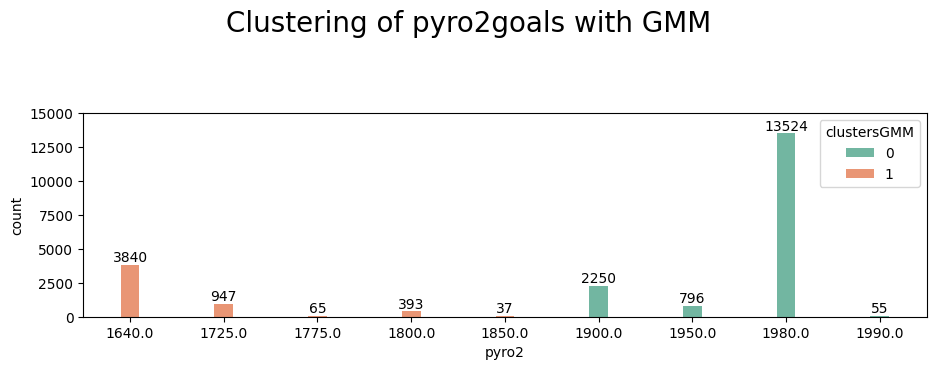

In [37]:
modelGMM = GaussianMixture(n_components=2).fit(dfXY.pyro2.to_numpy().reshape(-1,1))
clustersGMM = modelGMM.predict(dfXY.pyro2.to_numpy().reshape(-1,1))
print(np.unique(clustersGMM))

fig,ax = plt.subplots(1,1,figsize=(10,4))
fig.suptitle("Clustering of pyro2goals with GMM",fontsize=20)
#Compute df
clusteringGMM=pd.merge(right=pd.concat([pd.DataFrame(dfXY.pyro2).reset_index(drop=True),pd.DataFrame(clustersGMM,columns=['clustersGMM'])],axis=1).drop_duplicates(),left=pd.DataFrame(dfXY.pyro2.value_counts()).reset_index(), how='inner',on='pyro2').sort_values(by=['pyro2'])
#Plor barplot
sns.barplot(data=clusteringGMM,x='pyro2',y='count',hue='clustersGMM',palette="Set2",width=.2,ax=ax)#,ax=ax[1]
#Add labels
barRectangles = ax.patches
labels = clusteringGMM['count'].values
label_i=0
#Cannot loop through zip(barRectangles,labels) bc barRect is larger as there are rect in the bins with 0 counts
for rect in barRectangles:#zip()stop when the shortest list ends, iterate through rect bars
    height = rect.get_height()
    if height != 0:
        #print(rect.get_x(),height+6,label)
        ax.text(x=rect.get_x()+rect.get_width()/2,y=height+6,s=str(int(height)),ha="center",va="bottom",color="black",fontsize=10)#s=str(labels[label_i])
        label_i+=1

#Make room for all labels in plot
ax.set_ylim(top=max(labels)+1500)
#Other way, but not centered horizontally as u dont have the width of the bars
#for index, value in dfXY.pyro2.value_counts().sort_index().items():
#    axes[r,c].text(x=index, y=value, s=value, color='yellow', ha='center')

fig.tight_layout(pad=3)

In [38]:
clusteringGMM

,pyro2,count,clustersGMM
1,1640.0,3840,1
3,1725.0,947,1
6,1775.0,65,1
5,1800.0,393,1
8,1850.0,37,1
2,1900.0,2250,0
4,1950.0,796,0
0,1980.0,13524,0
7,1990.0,55,0


In [39]:
#Assign meaningfull labels to clusters
a=pd.DataFrame(modelGMM.means_,columns=["center"]).assign(label = lambda x: x.iloc[:,0].map(lambda y: "HighGoal" if y==x.max()[0] else "LowGoal")).reset_index(names="cluster")
a

C:\Users\carlo\AppData\Local\Temp\ipykernel_4656\2516869773.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  a=pd.DataFrame(modelGMM.means_,columns=["center"]).assign(label = lambda x: x.iloc[:,0].map(lambda y: "HighGoal" if y==x.max()[0] else "LowGoal")).reset_index(names="cluster")


,cluster,center,label
0,0,1967.716144,HighGoal
1,1,1670.030770,LowGoal


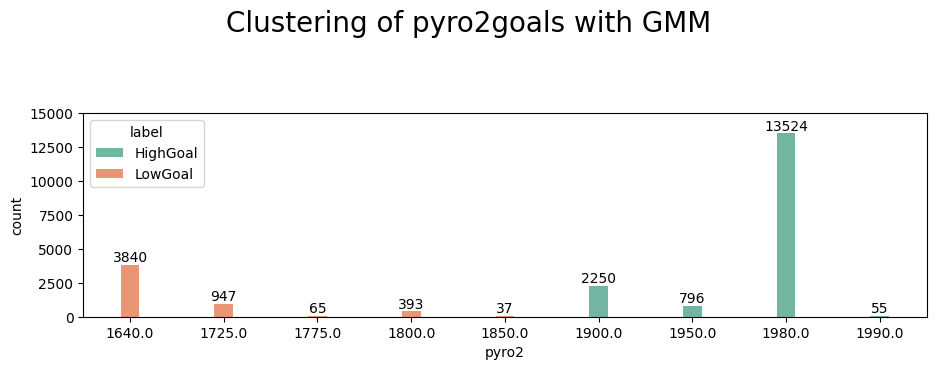

In [40]:
#Print pyro2 clusters with new label
fig,ax = plt.subplots(1,1,figsize=(10,4))
fig.suptitle("Clustering of pyro2goals with GMM",fontsize=20)
#Compute df
clusteringGMM=clusteringGMM.assign(label=lambda x: x.clustersGMM.map(lambda y: "HighGoal" if y==a.loc[a.label=="HighGoal","cluster"].values[0] else "LowGoal").astype("category"))
#Plor barplot
sns.barplot(data=clusteringGMM,x='pyro2',y='count',hue='label',palette="Set2",width=.2,ax=ax)#,ax=ax[1]
#Add labels
barRectangles = ax.patches
labels = clusteringGMM['count'].values
label_i=0
#Cannot loop through zip(barRectangles,labels) bc barRect is larger as there are rect in the bins with 0 counts
for rect in barRectangles:#zip()stop when the shortest list ends, iterate through rect bars
    height = rect.get_height()
    if height != 0:
        #print(rect.get_x(),height+6,label)
        ax.text(x=rect.get_x()+rect.get_width()/2,y=height+6,s=str(int(height)),ha="center",va="bottom",color="black",fontsize=10)#s=str(labels[label_i])
        label_i+=1

#Make room for all labels in plot
ax.set_ylim(top=max(labels)+1500)
fig.tight_layout(pad=3)

In [41]:
#Add clusters to dfXY
#if dfXY.SteelFamCluster.shape: dfXY.drop("SteelFamCluster",axis=1,inplace=True)
dfXY.loc[:,'SteelFamCluster']=pd.DataFrame(clustersGMM,columns=['clustersGMM'],index=dfXY.index,dtype=np.int64).map(lambda y: "HighGoal" if y==a.loc[a.label=="HighGoal","cluster"].values[0] else "LowGoal").astype("category")
dfXY=dfXY.copy()
dfXY.SteelFamCluster.dtypes

CategoricalDtype(categories=['HighGoal', 'LowGoal'], ordered=False, categories_dtype=object)

In [42]:
#Statistic description of numeric vars
dfXY_description=dfXY.describe()
dfXY_description

,AP1_FurnaceThickness,AP1_FurnaceWidth,AP1_FurnaceCombustionAirPressureCV,AP1_FurnaceCombustionAirPressureFeedback,AP1_FurnaceCombustionAirPressureSetPoint,AP1_FurnaceCombustionAirTempFurnace,AP1_FurnaceDilutionAirTemperatureCV,AP1_FurnaceDilutionAirTemperatureFeedback,AP1_FurnaceDilutionAirTemperatureSetPoint,AP1_FurnaceLineSpeed,...,AP1_FurnaceZone8TopAirGasRatioActual,AP1_FurnaceZone8TopAirGasRatioSetpoint,AP1_FurnaceZone8TopGasFlowControlValveOutput,AP1_FurnaceZone8TopGasFlowFeedback,AP1_FurnaceZone8TopTemp,CurrentGuage,CurrentWidth,CoilLength,NetWeight,pyro2
count,21907.000000,21907.000000,21907.0,21907.000000,21907.0,21907.000000,21907.0,21907.000000,21907.0,21907.000000,...,21907.000000,21907.000000,21907.000000,21907.000000,21907.000000,21907.000000,21907.000000,21907.000000,21907.000000,21907.000000
mean,0.069078,56.306751,100.0,1.115239,2.0,432.273056,0.0,426.635041,1700.0,119.571943,...,1.776004,1.199973,35.152377,3.452674,1977.255034,0.069087,56.478689,6286.391080,62566.733008,1896.040991
std,0.037422,6.621839,0.0,0.249432,0.0,68.166932,0.0,65.338182,0.0,50.965182,...,2.790560,0.002340,15.179243,2.076241,222.669463,0.037437,6.678104,3458.378325,9415.245745,132.100182
min,0.022000,37.000000,100.0,0.691062,2.0,157.215286,0.0,160.497681,1700.0,0.000000,...,0.833438,1.000000,5.000000,0.005723,873.977173,0.022000,36.770200,1323.600000,15630.000000,1640.000000
25%,0.034500,49.000000,100.0,0.904534,2.0,401.665817,0.0,398.300049,1700.0,84.310143,...,1.200340,1.200000,21.441599,1.302536,1852.681152,0.034500,49.286200,3284.400000,57150.000000,1900.000000
50%,0.057500,61.000000,100.0,1.095340,2.0,461.863647,0.0,454.599518,1700.0,121.916977,...,1.203946,1.200000,37.638889,3.704920,2052.666260,0.057500,61.254300,5575.900000,66070.000000,1980.000000
75%,0.101500,61.000000,100.0,1.315594,2.0,478.798187,0.0,470.602295,1700.0,164.133095,...,1.249647,1.200000,50.737694,5.763925,2127.128540,0.101500,61.411700,9113.400000,70450.000000,1980.000000
max,0.176000,63.000000,100.0,1.728980,2.0,532.595581,0.0,524.375061,1700.0,220.024429,...,162.270401,1.200000,100.000000,6.040122,2214.954834,0.176000,62.868400,14958.600000,72930.000000,1990.000000


In [43]:
#Cuts to consider outliers
cut_neg = dfXY_description.iloc[1] - 3*dfXY_description.iloc[2] #mean-3*std
cut_pos = dfXY_description.iloc[1] + 3*dfXY_description.iloc[2] #mean+3*std
cut_neg.name = 'cut-'
cut_pos.name = 'cut+'
cut_neg = pd.DataFrame(cut_neg).T
cut_pos = pd.DataFrame(cut_pos).T
tbl_desc = pd.concat([dfXY_description,cut_neg, cut_pos])
tbl_desc

,AP1_FurnaceThickness,AP1_FurnaceWidth,AP1_FurnaceCombustionAirPressureCV,AP1_FurnaceCombustionAirPressureFeedback,AP1_FurnaceCombustionAirPressureSetPoint,AP1_FurnaceCombustionAirTempFurnace,AP1_FurnaceDilutionAirTemperatureCV,AP1_FurnaceDilutionAirTemperatureFeedback,AP1_FurnaceDilutionAirTemperatureSetPoint,AP1_FurnaceLineSpeed,...,AP1_FurnaceZone8TopAirGasRatioActual,AP1_FurnaceZone8TopAirGasRatioSetpoint,AP1_FurnaceZone8TopGasFlowControlValveOutput,AP1_FurnaceZone8TopGasFlowFeedback,AP1_FurnaceZone8TopTemp,CurrentGuage,CurrentWidth,CoilLength,NetWeight,pyro2
count,21907.000000,21907.000000,21907.0,21907.000000,21907.0,21907.000000,21907.0,21907.000000,21907.0,21907.000000,...,21907.000000,21907.000000,21907.000000,21907.000000,21907.000000,21907.000000,21907.000000,21907.000000,21907.000000,21907.000000
mean,0.069078,56.306751,100.0,1.115239,2.0,432.273056,0.0,426.635041,1700.0,119.571943,...,1.776004,1.199973,35.152377,3.452674,1977.255034,0.069087,56.478689,6286.391080,62566.733008,1896.040991
std,0.037422,6.621839,0.0,0.249432,0.0,68.166932,0.0,65.338182,0.0,50.965182,...,2.790560,0.002340,15.179243,2.076241,222.669463,0.037437,6.678104,3458.378325,9415.245745,132.100182
min,0.022000,37.000000,100.0,0.691062,2.0,157.215286,0.0,160.497681,1700.0,0.000000,...,0.833438,1.000000,5.000000,0.005723,873.977173,0.022000,36.770200,1323.600000,15630.000000,1640.000000
25%,0.034500,49.000000,100.0,0.904534,2.0,401.665817,0.0,398.300049,1700.0,84.310143,...,1.200340,1.200000,21.441599,1.302536,1852.681152,0.034500,49.286200,3284.400000,57150.000000,1900.000000
50%,0.057500,61.000000,100.0,1.095340,2.0,461.863647,0.0,454.599518,1700.0,121.916977,...,1.203946,1.200000,37.638889,3.704920,2052.666260,0.057500,61.254300,5575.900000,66070.000000,1980.000000
75%,0.101500,61.000000,100.0,1.315594,2.0,478.798187,0.0,470.602295,1700.0,164.133095,...,1.249647,1.200000,50.737694,5.763925,2127.128540,0.101500,61.411700,9113.400000,70450.000000,1980.000000
max,0.176000,63.000000,100.0,1.728980,2.0,532.595581,0.0,524.375061,1700.0,220.024429,...,162.270401,1.200000,100.000000,6.040122,2214.954834,0.176000,62.868400,14958.600000,72930.000000,1990.000000
cut-,-0.043189,36.441236,100.0,0.366942,2.0,227.772258,0.0,230.620495,1700.0,-33.323604,...,-6.595676,1.192952,-10.385352,-2.776047,1309.246645,-0.043225,36.444376,-4088.743895,34320.995773,1499.740445
cut+,0.181344,76.172267,100.0,1.863536,2.0,636.773853,0.0,622.649587,1700.0,272.467490,...,10.147683,1.206994,80.690105,9.681396,2645.263423,0.181400,76.513001,16661.526056,90812.470242,2292.341538


In [44]:
#Final Tune cut
for c in range(tbl_desc.shape[1]):
    if tbl_desc.loc['cut-',tbl_desc.columns[c]]<0:
        tbl_desc.loc['cut-',tbl_desc.columns[c]]=0
    if tbl_desc.columns[c]=='CurrentWidth':
        tbl_desc.loc['cut-',tbl_desc.columns[c]]=0 #some widthIDs are smaller than the actual cut-
    elif tbl_desc.columns[c]=='NetWeight':
        tbl_desc.loc['cut-',tbl_desc.columns[c]]=5000 #min around 20k, if cut for defects would be 10k. To be conservative 5k
    elif tbl_desc.columns[c] in tbl_desc.columns[tbl_desc.columns.str.contains('Ratio',regex=False)]:
        tbl_desc.loc['cut-',tbl_desc.columns[c]]=0
        tbl_desc.loc['cut+',tbl_desc.columns[c]]=4
    elif tbl_desc.columns[c] in tbl_desc.columns[tbl_desc.columns.str.contains('.*ControlValve.*|.*CV.*',regex=True)]:
        tbl_desc.loc['cut-',tbl_desc.columns[c]]=0
        tbl_desc.loc['cut+',tbl_desc.columns[c]]=100
    elif tbl_desc.columns[c] in tbl_desc.columns[tbl_desc.columns.str.contains('.*Zone0.*',regex=True) & ~tbl_desc.columns.str.contains('.*Zone0.*Ratio.*',regex=True) & ~tbl_desc.columns.str.contains('.*Temp.*',regex=True)]:#Zone0 is in %
        tbl_desc.loc['cut-',tbl_desc.columns[c]]=0
        tbl_desc.loc['cut+',tbl_desc.columns[c]]=100
    elif tbl_desc.columns[c] in zoneTemp_vars_series[~zoneTemp_vars_series.str.contains("CV",regex=False)]:
        if tbl_desc.loc['cut-',tbl_desc.columns[c]]<=500:
            tbl_desc.loc['cut-',tbl_desc.columns[c]]=500 #Zone 0 seems to have many values near 0 that are outside the bell
    elif tbl_desc.columns[c] in pyro_vars_series[pyro_vars_series.str.contains("Temp",regex=False)]:
        tbl_desc.loc['cut-',tbl_desc.columns[c]]=1400 #pyro sensors seem to have many values at 1200 that are outside the bimodal bell, p() bc it is the lower limit of the sensor
tbl_desc

,AP1_FurnaceThickness,AP1_FurnaceWidth,AP1_FurnaceCombustionAirPressureCV,AP1_FurnaceCombustionAirPressureFeedback,AP1_FurnaceCombustionAirPressureSetPoint,AP1_FurnaceCombustionAirTempFurnace,AP1_FurnaceDilutionAirTemperatureCV,AP1_FurnaceDilutionAirTemperatureFeedback,AP1_FurnaceDilutionAirTemperatureSetPoint,AP1_FurnaceLineSpeed,...,AP1_FurnaceZone8TopAirGasRatioActual,AP1_FurnaceZone8TopAirGasRatioSetpoint,AP1_FurnaceZone8TopGasFlowControlValveOutput,AP1_FurnaceZone8TopGasFlowFeedback,AP1_FurnaceZone8TopTemp,CurrentGuage,CurrentWidth,CoilLength,NetWeight,pyro2
count,21907.000000,21907.000000,21907.0,21907.000000,21907.0,21907.000000,21907.0,21907.000000,21907.0,21907.000000,...,21907.000000,21907.000000,21907.000000,21907.000000,21907.000000,21907.000000,21907.000000,21907.000000,21907.000000,21907.000000
mean,0.069078,56.306751,100.0,1.115239,2.0,432.273056,0.0,426.635041,1700.0,119.571943,...,1.776004,1.199973,35.152377,3.452674,1977.255034,0.069087,56.478689,6286.391080,62566.733008,1896.040991
std,0.037422,6.621839,0.0,0.249432,0.0,68.166932,0.0,65.338182,0.0,50.965182,...,2.790560,0.002340,15.179243,2.076241,222.669463,0.037437,6.678104,3458.378325,9415.245745,132.100182
min,0.022000,37.000000,100.0,0.691062,2.0,157.215286,0.0,160.497681,1700.0,0.000000,...,0.833438,1.000000,5.000000,0.005723,873.977173,0.022000,36.770200,1323.600000,15630.000000,1640.000000
25%,0.034500,49.000000,100.0,0.904534,2.0,401.665817,0.0,398.300049,1700.0,84.310143,...,1.200340,1.200000,21.441599,1.302536,1852.681152,0.034500,49.286200,3284.400000,57150.000000,1900.000000
50%,0.057500,61.000000,100.0,1.095340,2.0,461.863647,0.0,454.599518,1700.0,121.916977,...,1.203946,1.200000,37.638889,3.704920,2052.666260,0.057500,61.254300,5575.900000,66070.000000,1980.000000
75%,0.101500,61.000000,100.0,1.315594,2.0,478.798187,0.0,470.602295,1700.0,164.133095,...,1.249647,1.200000,50.737694,5.763925,2127.128540,0.101500,61.411700,9113.400000,70450.000000,1980.000000
max,0.176000,63.000000,100.0,1.728980,2.0,532.595581,0.0,524.375061,1700.0,220.024429,...,162.270401,1.200000,100.000000,6.040122,2214.954834,0.176000,62.868400,14958.600000,72930.000000,1990.000000
cut-,0.000000,36.441236,0.0,0.366942,2.0,227.772258,0.0,230.620495,1700.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,1309.246645,0.000000,0.000000,0.000000,5000.000000,1499.740445
cut+,0.181344,76.172267,100.0,1.863536,2.0,636.773853,100.0,622.649587,1700.0,272.467490,...,4.000000,4.000000,100.000000,9.681396,2645.263423,0.181400,76.513001,16661.526056,90812.470242,2292.341538


In [45]:
tbl_desc.columns[tbl_desc.columns.str.contains('.*ControlValve.*|.*CV.*',regex=True)]

Index(['AP1_FurnaceCombustionAirPressureCV',
       'AP1_FurnaceDilutionAirTemperatureCV', 'AP1_FurnacePressureCV',
       'AP1_FurnaceZone0BottomAirFlowControlValveCV',
       'AP1_FurnaceZone0BottomGasFlowControlValveCV',
       'AP1_FurnaceZone0MasterTempControlValveCV',
       'AP1_FurnaceZone0TopAirFlowControlValveCV',
       'AP1_FurnaceZone0TopGasFlowControlValveCV',
       'AP1_FurnaceZone1BottomAirFlowControlValveOutput',
       'AP1_FurnaceZone1BottomGasFlowControlValveOutput',
       'AP1_FurnaceZone1TopAirFlowControlValveOutput',
       'AP1_FurnaceZone1TopGasFlowControlValveOutput',
       'AP1_FurnaceZone2BottomAirFlowControlValveOutput',
       'AP1_FurnaceZone2BottomGasFlowControlValveOutput',
       'AP1_FurnaceZone2TopAirFlowControlValveOutput',
       'AP1_FurnaceZone2TopGasFlowControlValveOutput',
       'AP1_FurnaceZone3BottomAirFlowControlValveOutput',
       'AP1_FurnaceZone3BottomGasFlowControlValveOutput',
       'AP1_FurnaceZone3TopAirFlowControlValveOutput',


In [46]:
#We see that only Feedback vars have been affected by escalation
pd.concat([dfXYold_description.loc[["mean","25%","50%","75%"],zoneAirGas_vars_series],dfXY_description.loc[["mean","25%","50%","75%"],zoneAirGas_vars_series]])
pd.concat([dfXYold_description.loc[["mean"],zoneAirGas_vars_series],dfXY_description.loc[["mean"],zoneAirGas_vars_series]])

,AP1_FurnaceZone0BottomAir/GasRatioPV,AP1_FurnaceZone0BottomAir/GasRatioSP,AP1_FurnaceZone0BottomAirFlowControlValveCV,AP1_FurnaceZone0BottomAirFlowFdbk,AP1_FurnaceZone0BottomAirFlowSetpoint,AP1_FurnaceZone0BottomGasFlowControlValveCV,AP1_FurnaceZone0BottomGasFlowFdbk,AP1_FurnaceZone0TopAir/GasRatioPV,AP1_FurnaceZone0TopAir/GasRatioSP,AP1_FurnaceZone0TopAirFlowControlValveCV,...,AP1_FurnaceZone8BottomAirGasRatioSetPoint,AP1_FurnaceZone8BottomGasFlowControlValveOutput,AP1_FurnaceZone8BottomGasFlowFeedback,AP1_FurnaceZone8TopAirFlowControlValveOutput,AP1_FurnaceZone8TopAirFlowFeedback,AP1_FurnaceZone8TopAirFlowSetpoint,AP1_FurnaceZone8TopAirGasRatioActual,AP1_FurnaceZone8TopAirGasRatioSetpoint,AP1_FurnaceZone8TopGasFlowControlValveOutput,AP1_FurnaceZone8TopGasFlowFeedback
mean,1.40535,1.199973,31.183313,58.529068,55.977372,55.624143,59.525562,1.196541,1.199973,28.262849,...,1.199973,42.782369,58.128109,50.375535,47.701174,50.694432,1.776004,1.199973,35.152377,58.004930
mean,1.40535,1.199973,31.183313,58.529068,55.977372,55.624143,59.525562,1.196541,1.199973,28.262849,...,1.199973,42.782369,2.965720,50.375535,0.183114,50.694432,1.776004,1.199973,35.152377,3.452674
